## Project Data Wrangling
#### Wrangle Act

#### 1.Gathering

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import datetime as datetime
import re

In [3]:
# Download WeRateDogs Twitter archive manually
df = pd.read_csv('twitter_archive_enhanced.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
# Download URL for tweet image predictions programmatically 
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(URL)

In [5]:
# Save .tsv to file
with open('image-predictions.tsv', mode ='wb') as file:
    file.write(r.content)
# Read .tsv file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [5]:
r.encoding

'utf-8'

In [6]:
# Query tweets with given IDs via Twitter API
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

# Twitters Rate Limit
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [7]:
#Create tweet list
tweet_list = []
#Create tweet list for IDs that cannot be found (exceptions)
tweet_failed = []
for tweet_id in df['tweet_id']:
    try:
        tweet_list.append(api.get_status(tweet_id, tweet_mode='extended'))
        print(f'Successfully retrieved status for tweet with ID {tweet_id}')
    except Exception as e:
        print(e)
        tweet_failed.append(tweet_id)


Successfully retrieved status for tweet with ID 892420643555336193
Successfully retrieved status for tweet with ID 892177421306343426
Successfully retrieved status for tweet with ID 891815181378084864
Successfully retrieved status for tweet with ID 891689557279858688
Successfully retrieved status for tweet with ID 891327558926688256
Successfully retrieved status for tweet with ID 891087950875897856
Successfully retrieved status for tweet with ID 890971913173991426
Successfully retrieved status for tweet with ID 890729181411237888
Successfully retrieved status for tweet with ID 890609185150312448
Successfully retrieved status for tweet with ID 890240255349198849
Successfully retrieved status for tweet with ID 890006608113172480
Successfully retrieved status for tweet with ID 889880896479866881
Successfully retrieved status for tweet with ID 889665388333682689
Successfully retrieved status for tweet with ID 889638837579907072
Successfully retrieved status for tweet with ID 88953113534420

Successfully retrieved status for tweet with ID 868880397819494401
Successfully retrieved status for tweet with ID 868639477480148993
Successfully retrieved status for tweet with ID 868622495443632128
Successfully retrieved status for tweet with ID 868552278524837888
Successfully retrieved status for tweet with ID 867900495410671616
Successfully retrieved status for tweet with ID 867774946302451713
Successfully retrieved status for tweet with ID 867421006826221569
Successfully retrieved status for tweet with ID 867072653475098625
Successfully retrieved status for tweet with ID 867051520902168576
[{'code': 144, 'message': 'No status found with that ID.'}]
Successfully retrieved status for tweet with ID 866720684873056260
Successfully retrieved status for tweet with ID 866686824827068416
Successfully retrieved status for tweet with ID 866450705531457537
Successfully retrieved status for tweet with ID 866334964761202691
Successfully retrieved status for tweet with ID 866094527597207552
Su

[{'code': 144, 'message': 'No status found with that ID.'}]
Successfully retrieved status for tweet with ID 845397057150107648
Successfully retrieved status for tweet with ID 845306882940190720
Successfully retrieved status for tweet with ID 845098359547420673
Successfully retrieved status for tweet with ID 844979544864018432
Successfully retrieved status for tweet with ID 844973813909606400
Successfully retrieved status for tweet with ID 844704788403113984
Successfully retrieved status for tweet with ID 844580511645339650
Successfully retrieved status for tweet with ID 844223788422217728
Successfully retrieved status for tweet with ID 843981021012017153
Successfully retrieved status for tweet with ID 843856843873095681
Successfully retrieved status for tweet with ID 843604394117681152
Successfully retrieved status for tweet with ID 843235543001513987
[{'code': 144, 'message': 'No status found with that ID.'}]
Successfully retrieved status for tweet with ID 842846295480000512
Successfu

Successfully retrieved status for tweet with ID 828409743546925057
Successfully retrieved status for tweet with ID 828408677031882754
Successfully retrieved status for tweet with ID 828381636999917570
Successfully retrieved status for tweet with ID 828376505180889089
Successfully retrieved status for tweet with ID 828372645993398273
Successfully retrieved status for tweet with ID 828361771580813312
Successfully retrieved status for tweet with ID 828046555563323392
Successfully retrieved status for tweet with ID 828011680017821696
Successfully retrieved status for tweet with ID 827933404142436356
Successfully retrieved status for tweet with ID 827653905312006145
Successfully retrieved status for tweet with ID 827600520311402496
Successfully retrieved status for tweet with ID 827324948884643840
[{'code': 144, 'message': 'No status found with that ID.'}]
Successfully retrieved status for tweet with ID 827199976799354881
Successfully retrieved status for tweet with ID 826958653328592898
Su

Successfully retrieved status for tweet with ID 813187593374461952
Successfully retrieved status for tweet with ID 813172488309972993
Successfully retrieved status for tweet with ID 813157409116065792
Successfully retrieved status for tweet with ID 813142292504645637
Successfully retrieved status for tweet with ID 813130366689148928
Successfully retrieved status for tweet with ID 813127251579564032
Successfully retrieved status for tweet with ID 813112105746448384
Successfully retrieved status for tweet with ID 813096984823349248
Successfully retrieved status for tweet with ID 813081950185472002
Successfully retrieved status for tweet with ID 813066809284972545
Successfully retrieved status for tweet with ID 813051746834595840
Successfully retrieved status for tweet with ID 812781120811126785
Successfully retrieved status for tweet with ID 812747805718642688
Successfully retrieved status for tweet with ID 812709060537683968
Successfully retrieved status for tweet with ID 81250314395520

Successfully retrieved status for tweet with ID 780543529827336192
Successfully retrieved status for tweet with ID 780496263422808064
Successfully retrieved status for tweet with ID 780476555013349377
Successfully retrieved status for tweet with ID 780459368902959104
Successfully retrieved status for tweet with ID 780192070812196864
Successfully retrieved status for tweet with ID 780092040432480260
Successfully retrieved status for tweet with ID 780074436359819264
Successfully retrieved status for tweet with ID 779834332596887552
Successfully retrieved status for tweet with ID 779377524342161408
Successfully retrieved status for tweet with ID 779124354206535695
Successfully retrieved status for tweet with ID 779123168116150273
Successfully retrieved status for tweet with ID 779056095788752897
Successfully retrieved status for tweet with ID 778990705243029504
Successfully retrieved status for tweet with ID 778774459159379968
Successfully retrieved status for tweet with ID 77876494056810

Successfully retrieved status for tweet with ID 762464539388485633
Successfully retrieved status for tweet with ID 762316489655476224
Successfully retrieved status for tweet with ID 762035686371364864
Successfully retrieved status for tweet with ID 761976711479193600
Successfully retrieved status for tweet with ID 761750502866649088
Successfully retrieved status for tweet with ID 761745352076779520
Successfully retrieved status for tweet with ID 761672994376806400
Successfully retrieved status for tweet with ID 761599872357261312
Successfully retrieved status for tweet with ID 761371037149827077
Successfully retrieved status for tweet with ID 761334018830917632
Successfully retrieved status for tweet with ID 761292947749015552
Successfully retrieved status for tweet with ID 761227390836215808
Successfully retrieved status for tweet with ID 761004547850530816
Successfully retrieved status for tweet with ID 760893934457552897
Successfully retrieved status for tweet with ID 76065699497393

Successfully retrieved status for tweet with ID 749064354620928000
Successfully retrieved status for tweet with ID 749036806121881602
Successfully retrieved status for tweet with ID 748977405889503236
Successfully retrieved status for tweet with ID 748932637671223296
Successfully retrieved status for tweet with ID 748705597323898880
Successfully retrieved status for tweet with ID 748699167502000129
Successfully retrieved status for tweet with ID 748692773788876800
Successfully retrieved status for tweet with ID 748575535303884801
Successfully retrieved status for tweet with ID 748568946752774144
Successfully retrieved status for tweet with ID 748346686624440324
Successfully retrieved status for tweet with ID 748337862848962560
Successfully retrieved status for tweet with ID 748324050481647620
Successfully retrieved status for tweet with ID 748307329658011649
Successfully retrieved status for tweet with ID 748220828303695873
Successfully retrieved status for tweet with ID 74796361482967

Successfully retrieved status for tweet with ID 733828123016450049
Successfully retrieved status for tweet with ID 733822306246479872
Successfully retrieved status for tweet with ID 733482008106668032
Successfully retrieved status for tweet with ID 733460102733135873
Successfully retrieved status for tweet with ID 733109485275860992
Successfully retrieved status for tweet with ID 732732193018155009
Successfully retrieved status for tweet with ID 732726085725589504
Successfully retrieved status for tweet with ID 732585889486888962
Successfully retrieved status for tweet with ID 732375214819057664
Successfully retrieved status for tweet with ID 732005617171337216
Successfully retrieved status for tweet with ID 731285275100512256
Successfully retrieved status for tweet with ID 731156023742988288
Successfully retrieved status for tweet with ID 730924654643314689
Successfully retrieved status for tweet with ID 730573383004487680
Successfully retrieved status for tweet with ID 73042720112083

Successfully retrieved status for tweet with ID 712809025985978368
Successfully retrieved status for tweet with ID 712717840512598017
Successfully retrieved status for tweet with ID 712668654853337088
Successfully retrieved status for tweet with ID 712438159032893441
Successfully retrieved status for tweet with ID 712309440758808576
Successfully retrieved status for tweet with ID 712097430750289920
Successfully retrieved status for tweet with ID 712092745624633345
Successfully retrieved status for tweet with ID 712085617388212225
Successfully retrieved status for tweet with ID 712065007010385924
Successfully retrieved status for tweet with ID 711998809858043904
Successfully retrieved status for tweet with ID 711968124745228288
Successfully retrieved status for tweet with ID 711743778164514816
Successfully retrieved status for tweet with ID 711732680602345472
Successfully retrieved status for tweet with ID 711694788429553666
Successfully retrieved status for tweet with ID 71165265165045

Successfully retrieved status for tweet with ID 703407252292673536
Successfully retrieved status for tweet with ID 703382836347330562
Successfully retrieved status for tweet with ID 703356393781329922
Successfully retrieved status for tweet with ID 703268521220972544
Successfully retrieved status for tweet with ID 703079050210877440
Successfully retrieved status for tweet with ID 703041949650034688
Successfully retrieved status for tweet with ID 702932127499816960
Successfully retrieved status for tweet with ID 702899151802126337
Successfully retrieved status for tweet with ID 702684942141153280
Successfully retrieved status for tweet with ID 702671118226825216
Successfully retrieved status for tweet with ID 702598099714314240
Successfully retrieved status for tweet with ID 702539513671897089
Successfully retrieved status for tweet with ID 702332542343577600
Successfully retrieved status for tweet with ID 702321140488925184
Successfully retrieved status for tweet with ID 70227674884780

Successfully retrieved status for tweet with ID 693280720173801472
Successfully retrieved status for tweet with ID 693267061318012928
Successfully retrieved status for tweet with ID 693262851218264065
Successfully retrieved status for tweet with ID 693231807727280129
Successfully retrieved status for tweet with ID 693155686491000832
Successfully retrieved status for tweet with ID 693109034023534592
Successfully retrieved status for tweet with ID 693095443459342336
Successfully retrieved status for tweet with ID 692919143163629568
Successfully retrieved status for tweet with ID 692905862751522816
Successfully retrieved status for tweet with ID 692901601640583168
Successfully retrieved status for tweet with ID 692894228850999298
Successfully retrieved status for tweet with ID 692828166163931137
Successfully retrieved status for tweet with ID 692752401762250755
Successfully retrieved status for tweet with ID 692568918515392513
Successfully retrieved status for tweet with ID 69253530782521

Successfully retrieved status for tweet with ID 685906723014619143
Successfully retrieved status for tweet with ID 685681090388975616
Successfully retrieved status for tweet with ID 685667379192414208
Successfully retrieved status for tweet with ID 685663452032069632
Successfully retrieved status for tweet with ID 685641971164143616
Successfully retrieved status for tweet with ID 685547936038666240
Successfully retrieved status for tweet with ID 685532292383666176
Successfully retrieved status for tweet with ID 685325112850124800
Successfully retrieved status for tweet with ID 685321586178670592
Successfully retrieved status for tweet with ID 685315239903100929
Successfully retrieved status for tweet with ID 685307451701334016
Successfully retrieved status for tweet with ID 685268753634967552
Successfully retrieved status for tweet with ID 685198997565345792
Successfully retrieved status for tweet with ID 685169283572338688
Successfully retrieved status for tweet with ID 68496986080845

Successfully retrieved status for tweet with ID 679877062409191424
Successfully retrieved status for tweet with ID 679872969355714560
Successfully retrieved status for tweet with ID 679862121895714818
Successfully retrieved status for tweet with ID 679854723806179328
Successfully retrieved status for tweet with ID 679844490799091713
Successfully retrieved status for tweet with ID 679828447187857408
Successfully retrieved status for tweet with ID 679777920601223168
Successfully retrieved status for tweet with ID 679736210798047232
Successfully retrieved status for tweet with ID 679729593985699840
Successfully retrieved status for tweet with ID 679722016581222400
Successfully retrieved status for tweet with ID 679530280114372609
Successfully retrieved status for tweet with ID 679527802031484928
Successfully retrieved status for tweet with ID 679511351870550016
Successfully retrieved status for tweet with ID 679503373272485890
Successfully retrieved status for tweet with ID 67947595151693

Successfully retrieved status for tweet with ID 675781562965868544
Successfully retrieved status for tweet with ID 675740360753160193
Successfully retrieved status for tweet with ID 675710890956750848
Successfully retrieved status for tweet with ID 675707330206547968
Successfully retrieved status for tweet with ID 675706639471788032
Successfully retrieved status for tweet with ID 675534494439489536
Successfully retrieved status for tweet with ID 675531475945709568
Successfully retrieved status for tweet with ID 675522403582218240
Successfully retrieved status for tweet with ID 675517828909424640
Successfully retrieved status for tweet with ID 675501075957489664
Successfully retrieved status for tweet with ID 675497103322386432
Successfully retrieved status for tweet with ID 675489971617296384
Successfully retrieved status for tweet with ID 675483430902214656
Successfully retrieved status for tweet with ID 675432746517426176
Successfully retrieved status for tweet with ID 67537224044845

Successfully retrieved status for tweet with ID 673213039743795200
Successfully retrieved status for tweet with ID 673148804208660480
Successfully retrieved status for tweet with ID 672997845381865473
Successfully retrieved status for tweet with ID 672995267319328768
Successfully retrieved status for tweet with ID 672988786805112832
Successfully retrieved status for tweet with ID 672984142909456390
Successfully retrieved status for tweet with ID 672980819271634944
Successfully retrieved status for tweet with ID 672975131468300288
Successfully retrieved status for tweet with ID 672970152493887488
Successfully retrieved status for tweet with ID 672968025906282496
Successfully retrieved status for tweet with ID 672964561327235073
Successfully retrieved status for tweet with ID 672902681409806336
Successfully retrieved status for tweet with ID 672898206762672129
Successfully retrieved status for tweet with ID 672884426393653248
Successfully retrieved status for tweet with ID 67287761543959

Successfully retrieved status for tweet with ID 670733412878163972
Successfully retrieved status for tweet with ID 670727704916926465
Successfully retrieved status for tweet with ID 670717338665226240
Successfully retrieved status for tweet with ID 670704688707301377
Successfully retrieved status for tweet with ID 670691627984359425
Successfully retrieved status for tweet with ID 670679630144274432
Successfully retrieved status for tweet with ID 670676092097810432
Successfully retrieved status for tweet with ID 670668383499735048
Successfully retrieved status for tweet with ID 670474236058800128
Successfully retrieved status for tweet with ID 670468609693655041
Successfully retrieved status for tweet with ID 670465786746662913
Successfully retrieved status for tweet with ID 670452855871037440
Successfully retrieved status for tweet with ID 670449342516494336
Successfully retrieved status for tweet with ID 670444955656130560
Successfully retrieved status for tweet with ID 67044233787360

Successfully retrieved status for tweet with ID 668484198282485761
Successfully retrieved status for tweet with ID 668480044826800133
Successfully retrieved status for tweet with ID 668466899341221888
Successfully retrieved status for tweet with ID 668297328638447616
Successfully retrieved status for tweet with ID 668291999406125056
Successfully retrieved status for tweet with ID 668286279830867968
Successfully retrieved status for tweet with ID 668274247790391296
Successfully retrieved status for tweet with ID 668268907921326080
Successfully retrieved status for tweet with ID 668256321989451776
Successfully retrieved status for tweet with ID 668248472370458624
Successfully retrieved status for tweet with ID 668237644992782336
Successfully retrieved status for tweet with ID 668226093875376128
Successfully retrieved status for tweet with ID 668221241640230912
Successfully retrieved status for tweet with ID 668204964695683073
Successfully retrieved status for tweet with ID 66819068144637

Successfully retrieved status for tweet with ID 666073100786774016
Successfully retrieved status for tweet with ID 666071193221509120
Successfully retrieved status for tweet with ID 666063827256086533
Successfully retrieved status for tweet with ID 666058600524156928
Successfully retrieved status for tweet with ID 666057090499244032
Successfully retrieved status for tweet with ID 666055525042405380
Successfully retrieved status for tweet with ID 666051853826850816
Successfully retrieved status for tweet with ID 666050758794694657
Successfully retrieved status for tweet with ID 666049248165822465
Successfully retrieved status for tweet with ID 666044226329800704
Successfully retrieved status for tweet with ID 666033412701032449
Successfully retrieved status for tweet with ID 666029285002620928
Successfully retrieved status for tweet with ID 666020888022790149


In [14]:
# Write tweet_list (JSON) to .txt file
with open('tweet_json.txt', 'w', encoding = 'utf-8') as outfile:
    json.dump(tweet_list, outfile)
        
# Write tweet_failed into .txt file
tweet_failed_str = [str(tweet_id) for tweet_id in tweet_failed]
with open('tweet_failed.txt', 'w') as outfile:
    json.dump(tweet_failed_str, outfile)

In [6]:
# Simple solution for loading JSON data into a Pandas dataframe 
# without reading line-by-line
df_tweets = pd.read_json('tweet_json.txt')
df_tweets.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38454,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8466,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32956,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6232,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24823,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4132,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [7]:
# Info about available columns
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2340
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2341 non-null datetime64[ns]
display_text_range               2341 non-null object
entities                         2341 non-null object
extended_entities                2066 non-null object
favorite_count                   2341 non-null int64
favorited                        2341 non-null bool
full_text                        2341 non-null object
geo                              0 non-null float64
id                               2341 non-null int64
id_str                           2341 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [8]:
# Rename id to tweet_id
df_tweets = df_tweets.rename(columns={"id": "tweet_id"})
# Reduce columns to required columns
df_tweets = df_tweets[['tweet_id','retweet_count','favorite_count']]
df_tweets.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8466,38454
1,892177421306343426,6232,32956
2,891815181378084864,4132,24823


In [9]:
# Load JSON data
with open('tweet_json.txt') as json_file:
    tweet_list = json.load(json_file)

In [10]:
# Convert JSON data line-by-line to Pandas data frame
df_tweets = pd.DataFrame(columns = ['tweet_id','retweets','favorites'])
for tweet in tweet_list:
    df_tweets = df_tweets.append(
        {'tweet_id': tweet['id'], 
         'retweets': tweet['retweet_count'],
         'favorites': tweet['favorite_count']}, 
        ignore_index=True)


In [11]:
df_tweets.head(3)

,tweet_id,retweets,favorites
0,892420643555336193,8466,38454
1,892177421306343426,6232,32956
2,891815181378084864,4132,24823


### 2.Assessing

##### Visual Assessment

looking at:
- Columns header
- Number of columns
- Number of rows
- what each row represents
- datatypes in the cells (integer, floats, strings)

In [102]:
#twitter_archive
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [103]:
df.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [104]:
sum(df['tweet_id'].duplicated())

0

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [106]:
df.name.value_counts()

None           745
a               55
Charlie         12
Cooper          11
Lucy            11
Oliver          11
Lola            10
Penny           10
Tucker          10
Winston          9
Bo               9
Sadie            8
the              8
Buddy            7
Toby             7
Bailey           7
an               7
Daisy            7
Leo              6
Bella            6
Dave             6
Rusty            6
Koda             6
Jax              6
Jack             6
Oscar            6
Scout            6
Milo             6
Stanley          6
Oakley           5
              ... 
Traviss          1
Nimbus           1
Zeus             1
Halo             1
Flash            1
Brat             1
Brownie          1
Wishes           1
Rodney           1
Tassy            1
Zuzu             1
Dixie            1
Lugan            1
Napolean         1
Barney           1
Damon            1
Franq            1
Deacon           1
Shakespeare      1
Autumn           1
Bradley          1
Buckley     

In [107]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [108]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [109]:
# image_predictions
image_predictions.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [110]:
image_predictions.tail(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [111]:
sum(image_predictions['jpg_url'].duplicated())

66

In [112]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [113]:
# df_tweets for tweet_id, retweets and favorites
df_tweets.head(3)

,tweet_id,retweets,favorites
0,892420643555336193,8466,38454
1,892177421306343426,6232,32956
2,891815181378084864,4132,24823


In [114]:
df_tweets.tail(3)

,tweet_id,retweets,favorites
2338,666033412701032449,44,125
2339,666029285002620928,47,130
2340,666020888022790149,511,2557


In [115]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id     2341 non-null object
retweets     2341 non-null object
favorites    2341 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


###### FInd 8 Quality Issues

- inaccurate data
- corrupted (fehlerhaft) data
- duplicate data

(1) df.timestamp has wrong format (string/object to datetime)

(2) df_tweets.retweets and df_tweets.favorites have wrong format (string/object to integer)

(3) df.tweet_id and image_predictions.tweet_id have wrong format (int64 to string/ object)

(4) columns in df (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) are not usefull

(5) names column in df has names with just letters in it (e.g. 'a', 'an', 'by')

(6) only original tweets with images should be kept

(7) df has columns (in_reply_to_status_id, in_reply_to_user_id) that are not usefull here

(8) format of img_num should be an integer, because these cannot be decimals

###### Find 2 Tidiness Issues

- each variable forms a column
- each observation forms a row
- each observational unit forms a table

(1) 2 variables in 1 column (df.timestamp)

(2) all tables in one (df, image_predictions, df_tweets) 

(3) 2 columns for dog_breed and confidence_level (p1 - p3)

(4) dog_stages have values as columns, but shouls have 1 column with all values (doggo, floofer, pupper, puppo)

### 3.Cleaning

First, make a copy of each dataframe for cleaning.

In [12]:
df_clean = df.copy()
image_predictions_clean = image_predictions.copy()
df_tweets_clean = df_tweets.copy()

##### Define

(1) Change format of df.timestamp from object to datetime.

##### Code

In [13]:
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'])

##### Test

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

##### Define

(2) Change format of df_tweets.retweets and df_tweets.favorites (from object to integer).

#### Code

In [15]:
df_tweets_clean['retweets'] = df_tweets_clean.retweets.astype(int)

In [16]:
df_tweets_clean['favorites'] = df_tweets_clean.favorites.astype(int)

##### Test

In [17]:
df_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id     2341 non-null object
retweets     2341 non-null int64
favorites    2341 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


(3) Change format of tweet_id (from int64 to string) because you won't calculate with the IDs.

##### Code

In [18]:
df_clean['tweet_id'] = df_clean.tweet_id.astype(str)

In [19]:
image_predictions_clean['tweet_id'] = image_predictions_clean.tweet_id.astype(str)

##### Test

In [20]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

In [21]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


##### Define

(4) Merge tables (df_clean and image_predictions_clean) with an inner join on tweet_id.

##### Code

In [22]:
df_merge_clean = pd.merge(df_clean, image_predictions_clean, how='left', on='tweet_id')

In [23]:
df_merge_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [24]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 28 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                

##### Test

In [25]:
df_merge_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


##### Define

(5) Remove tweets without image.
Drop columns in df (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) since only original ratings are required.

##### Code

In [26]:
# Removing the tweets without image
df_merge_clean = df_merge_clean[pd.notnull(df_merge_clean['jpg_url'])]

In [27]:
# Removing retweets
df_merge_clean = df_merge_clean[pd.isnull(df['retweeted_status_id'])]
df_merge_clean.shape[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


1994

In [28]:
# Drop columns with retweet_status
df_merge_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [29]:
df_merge_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [30]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2           

##### Define

(6) Change format of img_num from float to integer, because these cannot be decimals.

##### Code

In [31]:
df_merge_clean['img_num'] = df_merge_clean.img_num.astype(int)

##### Test

In [32]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 25 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2             

##### Define

(7) Replace names in df that are just letters and don't look like names (e.g. 'a', 'an' or 'by').

##### Code

In [33]:
# Find 'wrong' names
df_merge_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jer

In [34]:
# replace names
remove_names = ['a', 'actually', 'all', 'an', 'by', 'his', 'my', 'officially', 'one', 
                'such', 'the', 'this', 'quite', 'very']
for removed_name in remove_names:
    df_merge_clean.name = df_merge_clean.name.replace(removed_name, None)

##### Test

In [35]:
# confirm that replacement worked
names = df_merge_clean.name.unique()
for removed_name in remove_names:
    assert(removed_name not in names)

In [36]:
# Repair index after drops
df_merge_clean.index = pd.RangeIndex(len(df_merge_clean.index))
df_merge_clean.tail(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1991,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
1992,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
1993,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


##### Define

(8) Find missing dog names (None) from tweet text

##### Code

In [37]:
named_match = re.compile('.*named (.\w+)')
for i, row in df_merge_clean[df_merge_clean.name == 'None'].iterrows():
    if 'named' in row['text']:
        name_from_text = named_match.match(row['text']).group(1)
        print(f'{i} Recovered name from tweet: {name_from_text}')
        df_merge_clean.loc[i, 'name'] = name_from_text

1503 Recovered name from tweet: Wylie
1679 Recovered name from tweet: Jacob
1710 Recovered name from tweet: Rufus
1772 Recovered name from tweet: Hemry
1790 Recovered name from tweet: Alphred
1809 Recovered name from tweet: Zeus
1868 Recovered name from tweet: Guss
1896 Recovered name from tweet: Jessiga
1908 Recovered name from tweet: Tickles
1912 Recovered name from tweet: Kohl
1949 Recovered name from tweet: Octaviath


In [38]:
# Correct wrong names with dog's name from tweet text
named_match = re.compile('.*named (.\w+)')
for i, row in df_merge_clean.iterrows():
    if 'named' in row['text']:
        name_from_text = named_match.match(row['text']).group(1)
        if row['name'] != name_from_text:
            print(f"{row['name']} != {name_from_text} => Corrected name to {name_from_text}")
            df_merge_clean.loc[i, 'name'] = name_from_text

Albert != Kip => Corrected name to Kip
Willy != Spork => Corrected name to Spork
Daisy != Cherokee => Corrected name to Cherokee
Kollin != Alfredo => Corrected name to Alfredo
Jaycob != Leroi => Corrected name to Leroi
Hanz != Berta => Corrected name to Berta
Gòrdón != Chuk => Corrected name to Chuk
Skittles != Alfonso => Corrected name to Alfonso
Shaggy != Cheryl => Corrected name to Cheryl
Kial != Klint => Corrected name to Klint
Carll != Pepe => Corrected name to Pepe
Lugan != Johm => Corrected name to Johm


##### Test 

In [39]:
import re
named_match = re.compile('.*named (.\w+)')
for i, row in df_merge_clean.iterrows():
    if 'named' in row['text']:
        name_from_text = named_match.match(row['text']).group(1)
        assert(row['name'] == name_from_text)
        print(name_from_text)

Wylie
Kip
Jacob
Rufus
Spork
Cherokee
Hemry
Alphred
Alfredo
Zeus
Leroi
Berta
Chuk
Guss
Alfonso
Cheryl
Jessiga
Klint
Tickles
Kohl
Pepe
Octaviath
Johm


##### Define

(9) Compare rating_numerator and rating_denominator with first rating in tweet text and convert to floats

##### Code

In [57]:
# Convert rating_numerator and rating_denominator to float
df_merge_clean['rating_numerator'] = df_merge_clean['rating_numerator'].astype(float)
df_merge_clean['rating_denominator'] = df_merge_clean['rating_denominator'].astype(float)

In [71]:
# Check and correct rating_numerator and rating_denominator with first rating given in each tweet text
for i, row in df_merge_clean.iterrows():
    ratings = re.findall(r'(\d+\.\d+|\d+)/(\d+)', row['text'])
    if len(ratings):
        numerator, denominator = ratings[0]
        numerator = float(numerator)
        denominator = float(denominator)
        if row.rating_numerator != numerator or row.rating_denominator != denominator:
            print(f"Wrong {row.rating_numerator}/{row.rating_denominator} corrected to {numerator}/{denominator}\n\t{row['text']}")
            df_merge_clean.loc[i, 'rating_numerator'] = numerator
            df_merge_clean.loc[i, 'rating_denominator'] = denominator

Wrong 5.0/10.0 corrected to 13.5/10.0
	This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
Wrong 75.0/10.0 corrected to 9.75/10.0
	This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
Wrong 27.0/10.0 corrected to 11.27/10.0
	This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
Wrong 26.0/10.0 corrected to 11.26/10.0
	Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


##### Test

In [84]:
df_merge_clean['rating_numerator'].value_counts()

12.00      450
10.00      419
11.00      396
13.00      261
9.00       151
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
24.00        1
9.75         1
84.00        1
13.50        1
143.00       1
420.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64

In [85]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null datetime64[ns]
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null float64
rating_denominator       1994 non-null float64
name                     1994 non-null object
doggo                    1994 non-null object
floofer                  1994 non-null object
pupper                   1994 non-null object
puppo                    1994 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2         

##### Define

(10) Drop columns in df (in_reply_to_status_id, in_reply_to_user_id), because we don't need these columns.

##### Code

In [86]:
df_merge_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

##### Test

In [87]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    

##### Define

(11) df.timestamp has 2 entries (date and time) in 1 column, which should be 2 columns (1 each for date and time).

##### Code

In [88]:
df_merge_clean['timestamp'] = pd.to_datetime(df_merge_clean['timestamp'])

In [89]:
# Split timestamp column in 2 new columns named date and time
df_merge_clean['date'] = df_merge_clean['timestamp'].dt.date
df_merge_clean['time'] = df_merge_clean['timestamp'].dt.time

In [90]:
# Drop timestamp column
df_merge_clean = df_merge_clean.drop('timestamp', 1)

##### Test

In [91]:
df_merge_clean.head(3)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,2017-07-31,00:18:03


##### Define

(13) dog_stages have values as columns, but shouls have 1 column with all values.

##### Code

In [92]:
def get_dog_stages(df, value_vars):
    rows = []
    for i, row in df.iterrows():
        dog_stages = None
        for value_var in value_vars:
            if row[value_var] and row[value_var] != 'None':
                if not dog_stages:
                    dog_stages = row[value_var]
                else:
                    dog_stages = 'multiple'
        rows.append(dog_stages)
    return rows

In [93]:
df_merge_clean['dog_stages'] = get_dog_stages(df_merge_clean, value_vars=['doggo', 'floofer', 'pupper', 'puppo'])

In [94]:
df_merge_clean.dog_stages.unique()

array([None, 'doggo', 'puppo', 'pupper', 'floofer', 'multiple'], dtype=object)

In [95]:
df_merge_clean.shape[0]

1994

In [96]:
# Drop now useless columns 
df_merge_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [97]:
# Test for multiple
(df_merge_clean[df_merge_clean.tweet_id=='855851453814013952'].dog_stages == 'multiple').all()

True

In [98]:
print(df_merge_clean.dog_stages.value_counts())

pupper      203
doggo        63
puppo        22
multiple     11
floofer       7
Name: dog_stages, dtype: int64


In [99]:
df_merge_clean.sample(5)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stages
85,872261713294495745,"<a href=""http://twitter.com/download/iphone"" r...",This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13.0,10.0,Harry,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,...,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True,2017-06-07,01:19:32,None
186,846153765933735936,"<a href=""http://twitter.com/download/iphone"" r...",This is Vixen. He really likes bananas. Steals...,https://twitter.com/dog_rates/status/846153765...,13.0,10.0,Vixen,https://pbs.twimg.com/media/C74kWqoU8AEaf3v.jpg,1,giant_schnauzer,...,True,flat-coated_retriever,0.218451,True,Labrador_retriever,0.108020,True,2017-03-27,00:15:53,None
988,709198395643068416,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45.0,50.0,None,https://pbs.twimg.com/media/CdeUKpcWoAAJAWJ.jpg,1,borzoi,...,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True,2016-03-14,02:04:08,None
1980,666082916733198337,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,https://twitter.com/dog_rates/status/666082916...,6.0,10.0,None,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,...,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True,2015-11-16,02:38:37,None
533,781163403222056960,"<a href=""http://twitter.com/download/iphone"" r...","We normally don't rate lobsters, but this one ...",https://twitter.com/dog_rates/status/781163403...,10.0,10.0,None,https://pbs.twimg.com/media/Ctc_-BTWEAAQpZh.jpg,1,Shetland_sheepdog,...,True,collie,0.025188,True,Border_collie,0.000297,True,2016-09-28,16:07:23,None


##### Define

(14) Condensing columns for dog_breed and confidence_level.

##### Code

In [100]:
def get_dog_breed(df):
    dog_breed = []
    conf_level = []
    for i, row in df.iterrows():
        if row['p1_dog']: 
            dog_breed.append(row['p1'])
            conf_level.append(row['p1_conf'])
        elif row['p2_dog']:
            dog_breed.append(row['p2'])
            conf_level.append(row['p2_conf'])
        elif row['p3_dog']:
            dog_breed.append(row['p3'])
            conf_level.append(row['p3_conf'])
        else:
            dog_breed.append(None)
            conf_level.append(0)
    return dog_breed, conf_level

In [101]:
df_merge_clean['dog_breed'], df_merge_clean['conf_level'] = get_dog_breed(df_merge_clean)

##### Test

In [102]:
df_merge_clean.head(2)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,date,time,dog_stages,dog_breed,conf_level
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,...,0.085851,False,banana,0.076110,False,2017-08-01,16:23:56,None,None,0.000000
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,...,0.090647,True,papillon,0.068957,True,2017-08-01,00:17:27,None,Chihuahua,0.323581


In [103]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id              1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null object
date                  1994 non-null object
time                  1994 non-null object
dog_stages            306 non

In [104]:
# Drop columns
df_merge_clean.drop(['p1', 'p1_conf', 'p1_dog', 
                     'p2', 'p2_conf', 'p2_dog', 'p3', 
                     'p3_conf', 'p3_dog'], axis=1, inplace=True)

In [105]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 14 columns):
tweet_id              1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
date                  1994 non-null object
time                  1994 non-null object
dog_stages            306 non-null object
dog_breed             1686 non-null object
conf_level            1994 non-null float64
dtypes: float64(3), int64(1), object(10)
memory usage: 218.2+ KB


##### Define

(15) Merge df_merge_clean and df_tweets_clean on tweet_id and after this change tweet_id to string again.

##### Code

In [106]:
# Make sure that tweet_id is an int for merge
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(np.int64)
df_merge_clean.tweet_id = df_merge_clean.tweet_id.astype(np.int64)

In [107]:
# Merge
df_merge2_clean = pd.merge(df_merge_clean, df_tweets_clean, how='left', on='tweet_id')

In [108]:
# Make sure that tweet_id is an str again
df_tweets_clean.tweet_id = df_tweets_clean.tweet_id.astype(str)
df_merge2_clean.tweet_id = df_merge2_clean.tweet_id.astype(str)

##### Test

In [109]:
df_merge2_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,date,time,dog_stages,dog_breed,conf_level,retweets,favorites
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2017-08-01,16:23:56,None,None,0.000000,8466.0,38454.0
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2017-08-01,00:17:27,None,Chihuahua,0.323581,6232.0,32956.0
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,2017-07-31,00:18:03,None,Chihuahua,0.716012,4132.0,24823.0
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,2017-07-30,15:58:51,None,Labrador_retriever,0.168086,8592.0,41817.0
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,2017-07-29,16:00:24,None,basset,0.555712,9323.0,39989.0


In [110]:
df_merge2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
date                  1994 non-null object
time                  1994 non-null object
dog_stages            306 non-null object
dog_breed             1686 non-null object
conf_level            1994 non-null float64
retweets              1992 non-null float64
favorites             1992 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 264.8+ KB


### 4.Store Data

##### store data to .csv

In [111]:
# store cleaned data to 'twitter_archive_master.csv'
df_merge2_clean.to_csv('twitter_archive_master.csv', index=False) 

In [114]:
# Read in the new dataframe
twitter_archive_master= pd.read_csv('twitter_archive_master.csv')
# tweet_id to string again
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)

### 5.Analyze Data

In [115]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
date                  1994 non-null object
time                  1994 non-null object
dog_stages            306 non-null object
dog_breed             1686 non-null object
conf_level            1994 non-null float64
retweets              1992 non-null float64
favorites             1992 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 249.3+ KB


In [116]:
# sample of dataframe
twitter_archive_master.sample(30)

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,date,time,dog_stages,dog_breed,conf_level,retweets,favorites
1718,670842764863651840,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,1,2015-11-29,05:52:33,NaN,NaN,0.000000,9156.0,25245.0
313,822462944365645825,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,https://twitter.com/dog_rates/status/822462944...,14.0,10.0,Gabe,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg,3,2017-01-20,15:17:01,pupper,Pomeranian,0.960199,16255.0,30623.0
1569,674082852460433408,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sagitariot Baklava mix. Loves her ne...,https://twitter.com/dog_rates/status/674082852...,11.0,10.0,Bobbay,https://pbs.twimg.com/media/CVrSxy7WsAAFD2F.jpg,1,2015-12-08,04:27:30,NaN,Pomeranian,0.666957,179.0,778.0
1947,666804364988780544,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,https://twitter.com/dog_rates/status/666804364...,8.0,10.0,Jockson,https://pbs.twimg.com/media/CUD3A7YWoAA82N0.jpg,1,2015-11-18,02:25:23,NaN,English_setter,0.328792,94.0,244.0
1503,675706639471788032,"<a href=""http://twitter.com/download/iphone"" r...",This is a Sizzlin Menorah spaniel from Brookly...,https://twitter.com/dog_rates/status/675706639...,10.0,10.0,Wylie,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,2015-12-12,15:59:51,NaN,English_springer,0.990300,103.0,670.0
690,753420520834629632,"<a href=""http://twitter.com/download/iphone"" r...",Here we are witnessing an isolated squad of bo...,https://twitter.com/dog_rates/status/753420520...,11.0,10.0,None,https://pbs.twimg.com/ext_tw_video_thumb/75342...,1,2016-07-14,02:47:04,NaN,NaN,0.000000,3902.0,8460.0
275,828650029636317184,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",https://twitter.com/dog_rates/status/828650029...,14.0,10.0,Fiona,https://pbs.twimg.com/media/C3_0yhCWEAETXj2.jpg,1,2017-02-06,17:02:17,NaN,golden_retriever,0.649209,1479.0,10150.0
1047,704819833553219584,"<a href=""http://twitter.com/download/iphone"" r...",This is Chesterson. He's a Bolivian Scoop Dog....,https://twitter.com/dog_rates/status/704819833...,7.0,10.0,Chesterson,https://pbs.twimg.com/media/CcgF5ovW8AACrEU.jpg,1,2016-03-02,00:05:17,NaN,NaN,0.000000,1085.0,2795.0
704,751583847268179968,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10.0,None,https://pbs.twimg.com/media/Cm4phTpWcAAgLsr.jpg,1,2016-07-09,01:08:47,multiple,dalmatian,0.868304,1221.0,4712.0
842,732732193018155009,"<a href=""http://twitter.com/download/iphone"" r...",This is Ralpher. He's an East Guinean Flop Dog...,https://twitter.com/dog_rates/status/732732193...,12.0,10.0,Ralpher,https://pbs.twimg.com/media/CiswCQhWYAI5-QW.jpg,1,2016-05-18,00:39:02,NaN,Staffordshire_bullterrier,0.127969,578.0,2579.0


##### Insights  (3) & Visualizations (1)

- main statistics and outliers
- plot/ insights retweets and favorites
- plot/ insights dog breeds 
- plot/ insights dog names
- plot/ insights ratings

##### Main Statistics

In [117]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,img_num,conf_level,retweets,favorites
count,1994.000000,1994.000000,1994.000000,1994.000000,1992.000000,1992.000000
mean,12.237101,10.532096,1.203109,0.464991,2693.973896,8814.914157
std,41.471197,7.320710,0.560777,0.339470,4773.777838,12832.983524
min,0.000000,2.000000,1.000000,0.000000,12.000000,80.000000
25%,10.000000,10.000000,1.000000,0.140466,598.000000,1900.500000
50%,11.000000,10.000000,1.000000,0.459130,1299.500000,4004.500000
75%,12.000000,10.000000,1.000000,0.776387,3088.250000,11028.500000
max,1776.000000,170.000000,4.000000,0.999956,84467.000000,163793.000000


##### Insights

* conf_level is mostly 0.8 which is a good prediction in most cases
* the most convient ratings are between 10 and 12, the mean rating was 12
* there is an outlier for the rating_numerator at 1776
* there is an outlier for rating_denominator at 170
* for every 3rd favorite follows 1 retweet
* maximum number of pictures is 4, while most users choose 1 picture

##### Retweets & Favorites Plot

In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

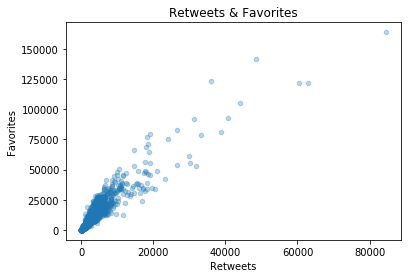

In [119]:
# plot retweets and favorites
twitter_archive_master.plot(kind='scatter',x = 'retweets',y = 'favorites', alpha = 0.3)
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.title('Retweets & Favorites')
plt.savefig('images/scatter_retweets_vs_favorites.png')

* looks like a strong correlation between retweets and favorites

##### Dog Breed

In [120]:
# number of different dog breeds
twitter_archive_master['dog_breed'].nunique()

113

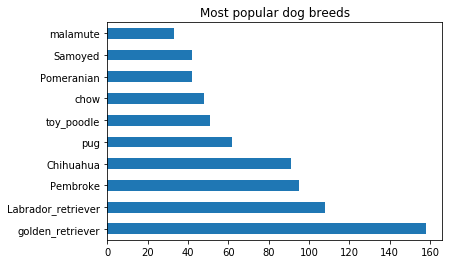

In [121]:
# plot the first 10 most popular dog breeds
twitter_archive_master.dog_breed.value_counts()[:10].plot(kind='barh', title ='Most popular dog breeds', 
                                                          x ='dog breeds', y = 'count')
plt.savefig('images/bar_popular_dog_breeds.png')

In [122]:
# most popular dog breed 'Golden Retriever'
twitter_archive_master[twitter_archive_master.dog_breed=='golden_retriever']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,date,time,dog_stages,dog_breed,conf_level,retweets,favorites
14,889531135344209921,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,10.0,Stuart,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,2017-07-24,17:02:04,puppo,golden_retriever,0.953442,2224.0,14974.0
16,888917238123831296,"<a href=""http://twitter.com/download/iphone"" r...",This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12.0,10.0,Jim,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,2017-07-23,00:22:39,NaN,golden_retriever,0.714719,4474.0,28856.0
17,888804989199671297,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13.0,10.0,Zeke,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,2017-07-22,16:56:37,NaN,golden_retriever,0.469760,4298.0,25388.0
39,883482846933004288,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,2017-07-08,00:28:19,NaN,golden_retriever,0.943082,9912.0,45569.0
41,883117836046086144,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,https://twitter.com/dog_rates/status/883117836...,13.0,10.0,None,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,2017-07-07,00:17:54,NaN,golden_retriever,0.949562,6642.0,36910.0
45,882268110199369728,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfy. You're witnessing his first wate...,https://twitter.com/dog_rates/status/882268110...,13.0,10.0,Alfy,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,2017-07-04,16:01:23,NaN,golden_retriever,0.762211,11537.0,44627.0
46,882045870035918850,"<a href=""http://twitter.com/download/iphone"" r...","This is Koko. Her owner, inspired by Barney, r...",https://twitter.com/dog_rates/status/882045870...,13.0,10.0,Koko,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,2017-07-04,01:18:17,NaN,golden_retriever,0.006941,4950.0,29120.0
53,880465832366813184,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She had her first beach experie...,https://twitter.com/dog_rates/status/880465832...,12.0,10.0,Bella,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,1,2017-06-29,16:39:47,NaN,golden_retriever,0.913255,6262.0,28316.0
70,876484053909872640,"<a href=""http://twitter.com/download/iphone"" r...",This is Benedict. He wants to thank you for th...,https://twitter.com/dog_rates/status/876484053...,13.0,10.0,Benedict,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,1,2017-06-18,16:57:37,NaN,golden_retriever,0.874566,2392.0,18628.0
93,870374049280663552,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,https://twitter.com/dog_rates/status/870374049...,13.0,10.0,Zoey,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,2017-06-01,20:18:38,NaN,golden_retriever,0.841001,26477.0,82688.0


In [123]:
# count distribution of dog breeds
print(twitter_archive_master.dog_breed.value_counts())

golden_retriever                  158
Labrador_retriever                108
Pembroke                           95
Chihuahua                          91
pug                                62
toy_poodle                         51
chow                               48
Pomeranian                         42
Samoyed                            42
malamute                           33
Chesapeake_Bay_retriever           31
French_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 25
Eskimo_dog                         22
Cardigan                           21
German_shepherd                    21
Staffordshire_bullterrier          21
Siberian_husky                     20
beagle                             20
Shih-Tzu                           20
Maltese_dog                        19
Rottweiler                         19
Shetland_sheepdog                  19
Lakeland_terrier                   18
kuvasz                             18
basset      

##### Dog Names

In [124]:
# number of different dog names
twitter_archive_master['name'].nunique()

941

In [125]:
# count distribution of dog names
print(twitter_archive_master.name.value_counts()[:30])

None       571
Oliver      12
Charlie     11
Cooper      10
Lucy        10
Penny        9
Tucker       9
Sadie        8
Winston      8
Toby         7
Lola         7
Stanley      7
Daisy        7
Bella        6
Louis        6
Jax          6
Bo           6
Koda         6
Oscar        5
Chester      5
Milo         5
Walter       5
Dave         5
Leo          5
Bailey       5
Rusty        5
Buddy        5
Gary         5
Scout        5
Reggie       4
Name: name, dtype: int64


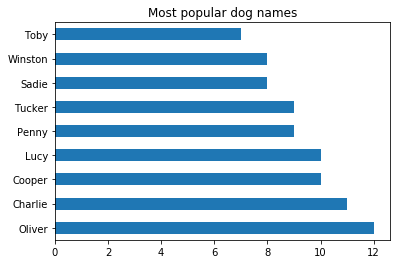

In [126]:
# plot distribution of first 10 most popular dog names
name_topchart = twitter_archive_master.name.value_counts()[:10]
# plot without None
name_topchart[1:].plot(kind='barh', title = 'Most popular dog names', x ='dog names', y ='count')
plt.savefig('images/bar_popular_dog_names.png')

In [194]:
# Dogs with the most popular name 'Oliver'
twitter_archive_master[twitter_archive_master.name=='Oliver']

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,date,time,dog_stages,dog_breed,conf_level,retweets,favorites
15,889278841981685760,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,https://twitter.com/dog_rates/status/889278841...,13.0,10.0,Oliver,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,2017-07-24,00:19:32,NaN,whippet,0.626152,5387.0,25091.0
227,836677758902222849,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,https://twitter.com/dog_rates/status/836677758...,11.0,10.0,Oliver,https://pbs.twimg.com/media/C5x57-TWUAEawQh.jpg,2,2017-02-28,20:41:37,NaN,NaN,0.000000,2423.0,13363.0
326,819952236453363712,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He has dreams of being a servi...,"https://www.gofundme.com/servicedogoliver,http...",13.0,10.0,Oliver,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,1,2017-01-13,17:00:21,puppo,American_Staffordshire_terrier,0.925505,1309.0,5717.0
673,756998049151549440,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,https://twitter.com/dog_rates/status/756998049...,11.0,10.0,Oliver,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,2016-07-23,23:42:53,NaN,golden_retriever,0.678555,2179.0,6709.0
770,745057283344719872,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's downright gorgeous as hel...,https://twitter.com/dog_rates/status/745057283...,12.0,10.0,Oliver,https://pbs.twimg.com/media/Clb5pLJWMAE-QS1.jpg,2,2016-06-21,00:54:33,NaN,Shetland_sheepdog,0.963985,2476.0,7688.0
894,721001180231503872,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. Bath time is upon him. His fea...,https://twitter.com/dog_rates/status/721001180...,11.0,10.0,Oliver,https://pbs.twimg.com/media/CgGCvxAUkAAx55r.jpg,1,2016-04-15,15:44:11,pupper,Samoyed,0.950053,661.0,2668.0
998,708356463048204288,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. That is his castle. He protect...,https://twitter.com/dog_rates/status/708356463...,10.0,10.0,Oliver,https://pbs.twimg.com/media/CdSWcc1XIAAXc6H.jpg,2,2016-03-11,18:18:36,NaN,pug,0.871283,1451.0,3821.0
1025,706538006853918722,"<a href=""http://twitter.com/download/iphone"" r...","This is Oliver (pronounced ""Ricardo""). He's a ...",https://twitter.com/dog_rates/status/706538006...,11.0,10.0,Oliver,https://pbs.twimg.com/media/Cc4gjxqW4AIoThO.jpg,1,2016-03-06,17:52:42,NaN,chow,0.541794,1529.0,3666.0
1110,698989035503689728,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He does toe touches in his sle...,https://twitter.com/dog_rates/status/698989035...,13.0,10.0,Oliver,https://pbs.twimg.com/media/CbNO0DaW0AARcki.jpg,1,2016-02-14,21:55:47,NaN,Norfolk_terrier,0.246340,1063.0,3589.0
1526,675111688094527488,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He thought what was insid...,https://twitter.com/dog_rates/status/675111688...,8.0,10.0,Oliver,https://pbs.twimg.com/media/CV56f54WsAEv4kJ.jpg,1,2015-12-11,00:35:44,NaN,Labrador_retriever,0.631501,267.0,1003.0


##### Ratings

In [127]:
# dog stage mean ratings
twitter_archive_master.groupby('dog_stages')['rating_numerator'].mean()

dog_stages
doggo       11.888889
floofer     12.000000
multiple    11.181818
pupper      10.636798
puppo       12.000000
Name: rating_numerator, dtype: float64

In [128]:
# dog stage mean retweets
twitter_archive_master.groupby('dog_stages')['retweets'].mean()

dog_stages
doggo       7163.920635
floofer     4755.571429
multiple    5236.000000
pupper      2284.453202
puppo       6386.681818
Name: retweets, dtype: float64

In [129]:
# dog breed mena ratings
twitter_archive_master.groupby('dog_breed')['rating_numerator'].mean()

dog_breed
Afghan_hound                       9.666667
Airedale                           9.833333
American_Staffordshire_terrier    10.312500
Appenzeller                       11.000000
Australian_terrier                11.500000
Bedlington_terrier                10.333333
Bernese_mountain_dog              11.272727
Blenheim_spaniel                  11.100000
Border_collie                     10.583333
Border_terrier                    12.142857
Boston_bull                        9.416667
Bouvier_des_Flandres              13.000000
Brabancon_griffon                 10.000000
Brittany_spaniel                  10.375000
Cardigan                          11.142857
Chesapeake_Bay_retriever          10.838710
Chihuahua                         10.516484
Dandie_Dinmont                     9.571429
Doberman                          11.333333
English_setter                     9.875000
English_springer                  10.500000
EntleBucher                       11.000000
Eskimo_dog            

In [130]:
# dog names mean rating
twitter_archive_master.groupby('dog_breed').mean()

,rating_numerator,rating_denominator,img_num,conf_level,retweets,favorites
dog_breed,,,,,,
Afghan_hound,9.666667,10.000000,1.000000,0.433959,5727.666667,16756.000000
Airedale,9.833333,10.000000,1.166667,0.583771,1335.000000,5119.500000
American_Staffordshire_terrier,10.312500,10.000000,1.187500,0.527359,2211.812500,9092.500000
Appenzeller,11.000000,10.000000,1.000000,0.503665,1393.000000,7119.500000
Australian_terrier,11.500000,10.000000,2.000000,0.307584,2947.000000,10798.500000
Bedlington_terrier,10.333333,10.000000,1.000000,0.286043,7252.000000,20731.666667
Bernese_mountain_dog,11.272727,10.000000,1.181818,0.766685,1547.636364,7074.454545
Blenheim_spaniel,11.100000,10.000000,1.400000,0.699588,2472.700000,9003.300000
Border_collie,10.583333,10.000000,1.416667,0.576845,2120.166667,8677.666667


In [132]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 16 columns):
tweet_id              1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
date                  1994 non-null object
time                  1994 non-null object
dog_stages            306 non-null object
dog_breed             1686 non-null object
conf_level            1994 non-null float64
retweets              1992 non-null float64
favorites             1992 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 249.3+ KB


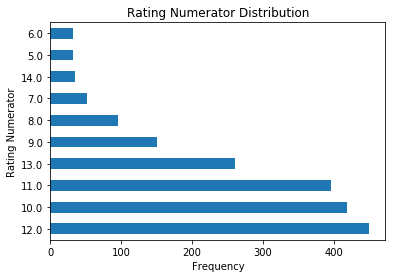

In [150]:
# plot distribution of first 10 most popular ratings
numerator_dist = twitter_archive_master.rating_numerator.value_counts().iloc[:10]
numerator_dist.plot(kind='barh', title = 'Rating Numerator Distribution', x ='rating_numerator', y ='count')
plt.xlabel('Frequency')
plt.ylabel('Rating Numerator')
plt.savefig('images/bar_distribution_of_ratings.png')

In [151]:
# the highest rating count
twitter_archive_master['rating_numerator'].value_counts()

12.00      450
10.00      419
11.00      396
13.00      261
9.00       151
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
24.00        1
9.75         1
84.00        1
13.50        1
143.00       1
420.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64